#Grupo 25 - Entregable Aprendizaje Supervisado

#Parte 3 de 3

Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor, XGBRFRegressor, XGBClassifier, XGBRFClassifier

random_state_n = 45

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url_test = "/content/drive/MyDrive/DIPLODATOS 2022 grupo 25/Entregables/4 - Aprendizaje Supervisado/df test procesado.csv"
url_train = "/content/drive/MyDrive/DIPLODATOS 2022 grupo 25/Entregables/4 - Aprendizaje Supervisado/df train procesado.csv"
df_train = pd.read_csv(url_train, sep = ',', index_col= 0)
df_test = pd.read_csv(url_test, sep = ',', index_col = 0)
print(df_train.shape, df_test.shape)

(7823, 22) (870, 21)


In [ ]:
df = df_train.copy()

In [ ]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,...,Cabin_qty,Total_ammenities,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan
PassengerId,,,,,,,,,,,,,,,,,,,,,
3430,0.0,0.721519,0.0,0.000000,0.129440,0.000553,0.008702,0.160527,0.0,0.571429,...,0.428571,0.220663,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
669,1.0,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.714286,...,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8430,1.0,0.417722,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.571429,...,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6463,0.0,0.544304,0.0,0.009911,0.040519,0.000000,0.000000,0.008453,0.0,0.714286,...,0.000000,0.043182,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
85,0.0,0.240506,0.0,0.000000,0.000000,0.028520,0.000045,0.001409,0.0,0.714286,...,0.285714,0.019590,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6528,0.0,0.151899,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.714286,...,0.285714,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2693,0.0,0.556962,0.0,0.000000,0.000000,0.031670,0.002767,0.000124,0.0,0.714286,...,0.000000,0.022480,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8076,1.0,0.696203,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.371429,...,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#for df in [df_train, df_test]:
#  %run 'content/drive/MyDrive/DIPLODATOS 2022 grupo 25/Entregables/4 - Aprendizaje Supervisado/3 - AS - Tunning Modelo y Evaluación/2 - AS - Preprocesamiento.ipynb'

In [ ]:
X = df.drop(columns = "Transported")
y = df.Transported

# Reducción del data frame
Luego de una gran cantidad de pruebas observamos que el mejor accuracy es obtenido tirando solo la columna "Num".



In [ ]:
X.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Deck', 'Num', 'Side', 'Cabin_qty', 'Total_ammenities',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_nan', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'Destination_nan'],
      dtype='object')

In [ ]:
drop_num = ["Num"]

In [ ]:
def drop_cols(X, cols):
  return X.drop(columns = cols_dropear)

In [ ]:
cols_dropear = drop_num
X = drop_cols(X, cols_dropear)

# División del data frame

Generamos un conjunto de "test" para evaluar los modelos (Train Test Split).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = random_state_n)

# Generación de grilla para el ajuste de hiperparámetros (Tunning)

Utilizaremos GridSearch Cross Validation para el modelo de  regresión logística, ya que la velocidad de este método permite recorrer toda la grilla de hiperparámetros. Este no es el caso para los métodos Random Forest y XGBoost, para los cuales utilizaremos RandomizedSearch Cross Validation.

In [ ]:
def tune_model(clf, param_grid, 
               x_train, x_test, 
               y_train, y_test,
               params_search = {}):
  cvc = GridSearchCV(clf, param_grid, cv = 5,  n_jobs = -1, **params_search)
  cvc.fit(x_train, y_train)

  results = cvc.cv_results_
  df_results = pd.DataFrame(results)

  display(df_results.sort_values('rank_test_score'))


  train_predictions = cvc.predict(x_train)
  accuracy = accuracy_score(y_train, train_predictions)
  print(f"Accuracy train {np.round(accuracy * 100.0,1)}%")

  test_predictions = cvc.predict(x_test)
  accuracy = accuracy_score(y_test, test_predictions)
  print(f"Accuracy test {np.round(accuracy * 100.0,1)}")

  print("\n Train")
  plot_confusion_matrix(cvc,x_train,y_train, normalize = 'true')

  print("\n Test")
  plot_confusion_matrix(cvc,x_test,y_test, normalize = 'true')

  return cvc


In [ ]:
def tune_model_random(clf, param_grid, 
               x_train, x_test, 
               y_train, y_test,
               params_search = {}):
  cvc = RandomizedSearchCV(clf, param_grid, n_iter = 30,cv = 5,  n_jobs = -1, **params_search)
  cvc.fit(x_train, y_train)

  results = cvc.cv_results_
  df_results = pd.DataFrame(results)

  display(df_results.sort_values('rank_test_score'))


  train_predictions = cvc.predict(x_train)
  accuracy = accuracy_score(y_train, train_predictions)
  print(f"Accuracy train {np.round(accuracy * 100.0,1)}%")

  test_predictions = cvc.predict(x_test)
  accuracy = accuracy_score(y_test, test_predictions)
  print(f"Accuracy test {np.round(accuracy * 100.0,1)}")

  print("\n Train")
  plot_confusion_matrix(cvc,x_train,y_train, normalize = 'true')

  print("\n Test")
  plot_confusion_matrix(cvc,x_test,y_test, normalize = 'true')

  return cvc

# Métodos

Modelos utilizados:

- Regresión Logística
- Random Forest
- XGBoost


In [ ]:
scoring_metric = 'accuracy'

## Regresión Logística

La regresión logística requiere dos parámetros: "C" y "penalty", los cuales serán optimizados a través de GridSearchCV.   



In [ ]:
Logist_regr_clf = LogisticRegression(random_state=random_state_n)

In [ ]:
C = np.logspace(-4, 4, 10)
penalty = ['l1', 'l2']
max_iter = [100,200]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = ["balanced", "auto"]
parameters_log_regr = dict(C=C,
                  penalty=penalty,
                  max_iter = max_iter,
                  solver = solver,
                  class_weight = class_weight)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
800 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: So

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
376,0.164962,0.007658,0.002941,0.001574,10000.0,balanced,200,l2,lbfgs,"{'C': 10000.0, 'class_weight': 'balanced', 'ma...",0.775547,0.778995,0.800913,0.793607,0.799087,0.789630,0.010430,1
326,0.086716,0.005807,0.002238,0.000275,1291.549665,balanced,100,l2,lbfgs,"{'C': 1291.5496650148827, 'class_weight': 'bal...",0.775547,0.780822,0.798174,0.793607,0.799087,0.789447,0.009529,2
378,0.329974,0.005454,0.002351,0.000297,10000.0,balanced,200,l2,sag,"{'C': 10000.0, 'class_weight': 'balanced', 'ma...",0.775547,0.779909,0.799087,0.792694,0.800000,0.789447,0.009990,2
254,0.507479,0.025814,0.002591,0.000314,21.544347,balanced,200,l1,saga,"{'C': 21.54434690031882, 'class_weight': 'bala...",0.775547,0.778082,0.799087,0.794521,0.799087,0.789265,0.010332,4
294,0.517249,0.032087,0.002270,0.000178,166.810054,balanced,200,l1,saga,"{'C': 166.81005372000558, 'class_weight': 'bal...",0.775547,0.778082,0.799087,0.792694,0.800913,0.789265,0.010556,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.000720,0.000101,0.000000,0.000000,0.005995,balanced,100,l1,lbfgs,"{'C': 0.005994842503189409, 'class_weight': 'b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,396
260,0.002318,0.002875,0.000000,0.000000,21.544347,auto,100,l1,newton-cg,"{'C': 21.54434690031882, 'class_weight': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,397
261,0.002398,0.002818,0.000000,0.000000,21.544347,auto,100,l1,lbfgs,"{'C': 21.54434690031882, 'class_weight': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,398
263,0.000773,0.000083,0.000000,0.000000,21.544347,auto,100,l1,sag,"{'C': 21.54434690031882, 'class_weight': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,399


Accuracy train 78.9%
Accuracy test 79.0

 Train

 Test


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


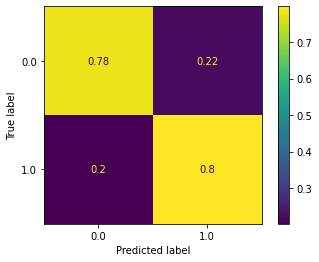

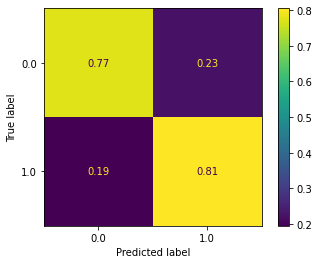

In [ ]:
cvc_log_regr = tune_model(Logist_regr_clf, parameters_log_regr, 
               x_train, x_test, 
               y_train, y_test,
               params_search = {'scoring':scoring_metric})

Observamos que con este método obtenemos:
- Accuracy train 78.9%
- Accuracy test 79.0%

Con estos resultados observamos que este método no presenta sobreajuste. 

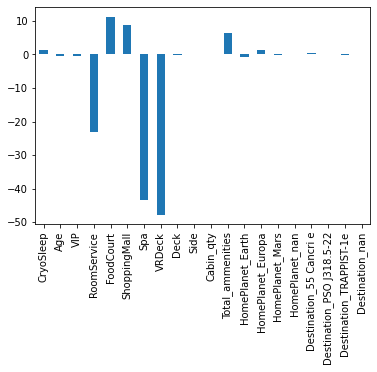

In [ ]:
#cvc.best_estimator_.coef_
bestcoef = pd.Series(cvc_log_regr.best_estimator_.coef_[0], index = X.columns)
bestcoef.plot(kind="bar")

Acá vemos que las variables más influyentes para la predicción son: "VRDeck", "Spa" y "RoomService", y en menor medida las variables "FoodCourt", "ShoppingMall" y "Total_ammenities".

## Random Forest

Los hiperparámetros optimizados de este modelo son: 'n_estimators', 'max_features', 'max_depth' y 'criterion'.

In [ ]:
clf_rforest = RandomForestClassifier(random_state=random_state_n)
rforest_grid = { 
    'n_estimators': [100,200, 350,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,8, 15, 30, None],
    'criterion' :['gini', 'entropy'],
    'class_weight': ["balanced", "auto"]
}

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
65 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 367, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 762, in _validate_y_class_weight
    % self.class_weight
ValueError: Valid pr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_criterion,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,1.666469,0.028692,0.088367,0.004440,350,sqrt,8,gini,balanced,"{'n_estimators': 350, 'max_features': 'sqrt', ...",0.794708,0.788128,0.811872,0.806393,0.803653,0.800951,0.008480,1
23,1.224068,0.341208,0.051546,0.003138,200,auto,8,gini,balanced,"{'n_estimators': 200, 'max_features': 'auto', ...",0.793796,0.789041,0.809132,0.806393,0.801826,0.800038,0.007566,2
6,4.545374,0.099293,0.166990,0.008191,500,log2,15,entropy,balanced,"{'n_estimators': 500, 'max_features': 'log2', ...",0.796533,0.785388,0.809132,0.807306,0.792694,0.798211,0.008941,3
4,1.965433,0.192416,0.078455,0.028576,200,log2,15,entropy,balanced,"{'n_estimators': 200, 'max_features': 'log2', ...",0.794708,0.787215,0.811872,0.808219,0.788128,0.798028,0.010213,4
12,0.623755,0.010376,0.027364,0.001947,100,log2,8,entropy,balanced,"{'n_estimators': 100, 'max_features': 'log2', ...",0.793796,0.781735,0.807306,0.800913,0.798174,0.796385,0.008536,5
26,3.542430,0.134737,0.120223,0.003213,350,sqrt,30,entropy,balanced,"{'n_estimators': 350, 'max_features': 'sqrt', ...",0.786496,0.780822,0.809132,0.799087,0.786301,0.792368,0.010303,6
25,3.373959,0.059689,0.167801,0.006141,500,auto,None,gini,balanced,"{'n_estimators': 500, 'max_features': 'auto', ...",0.785584,0.776256,0.810046,0.794521,0.785388,0.790359,0.011413,7
15,3.414139,0.032915,0.178523,0.008330,500,log2,30,gini,balanced,"{'n_estimators': 500, 'max_features': 'log2', ...",0.786496,0.776256,0.809132,0.793607,0.785388,0.790176,0.010967,8
29,5.719137,1.572598,0.161738,0.014855,500,sqrt,None,entropy,balanced,"{'n_estimators': 500, 'max_features': 'sqrt', ...",0.788321,0.773516,0.808219,0.796347,0.783562,0.789993,0.011732,9
27,6.199981,1.179539,0.182611,0.017837,500,auto,None,entropy,balanced,"{'n_estimators': 500, 'max_features': 'auto', ...",0.788321,0.773516,0.808219,0.796347,0.783562,0.789993,0.011732,9


Accuracy train 84.1%
Accuracy test 79.6

 Train


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



 Test


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


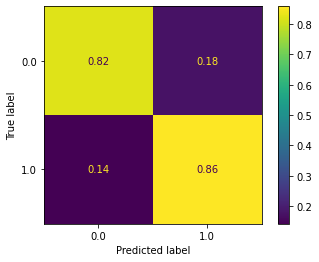

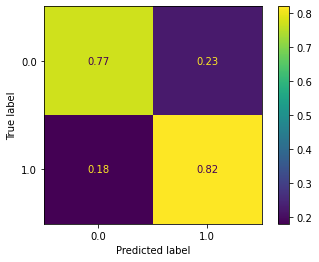

In [ ]:
cvc = tune_model_random(clf_rforest,
           rforest_grid,
            x_train, x_test, 
            y_train, y_test,
            params_search = {'scoring':scoring_metric})
cvc_rf = cvc

Observamos que con este método obtenemos:
- Accuracy train 84.1%
- Accuracy test 79.6%

Con estos resultados observamos que este método presenta un leve sobreajuste, y tiene un accuracy muy similar al del modelo de regresión logística. 

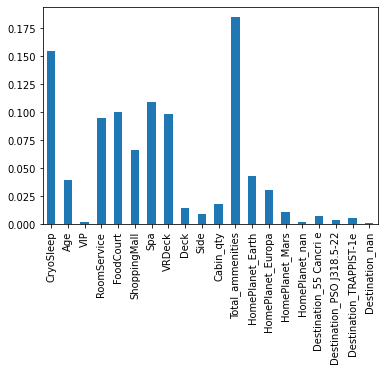

In [ ]:
#cvc.best_estimator_.feature_importance()
bestcoef = pd.Series(cvc.best_estimator_.feature_importances_, index = X.columns)
bestcoef.plot(kind="bar")

En este caso vemos que las variables más influyentes para la predicción son: "Total_ammenities", "CryoSleep", "Spa", "RoomService", "VRDeck", "FoodCourt", "ShoppingMall" y en menor medida las variables: "Deck", "Side", "Cabin_qty" y  las "HomePlantet".

## Gradient Boosting

Los hiperparámetros optimizados de este modelo son: colsample_bytree, learning_rate, max_depth, alpha y n_estimators. 

In [ ]:
from xgboost import XGBClassifier, XGBRFClassifier
xgb_clf = XGBClassifier(random_state = random_state_n)

xgboost_grid = dict(objective =['reg:squarederror', 'reg:logistic'],
                         colsample_bytree = [0.1,0.3,0.6],
                         learning_rate = [0.01, 0.1, 0.2, 0.5],
                         max_depth = [2,3,5,7,10], 
                         alpha = [20, 50, 100], 
                         n_estimators = [5,10, 50,100,250])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_objective,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.362028,0.003665,0.006182,0.000287,reg:logistic,50,7,0.1,0.6,20,"{'objective': 'reg:logistic', 'n_estimators': ...",0.793796,0.781735,0.808219,0.810046,0.804566,0.799672,0.010591,1
23,0.254644,0.003112,0.004103,0.000288,reg:logistic,100,2,0.1,0.6,50,"{'objective': 'reg:logistic', 'n_estimators': ...",0.795620,0.778082,0.807306,0.805479,0.799087,0.797115,0.010413,2
14,0.604287,0.006823,0.009494,0.000276,reg:squarederror,250,3,0.2,0.3,20,"{'objective': 'reg:squarederror', 'n_estimator...",0.791971,0.776256,0.805479,0.802740,0.803653,0.796020,0.010954,3
20,0.675494,0.011222,0.009470,0.000146,reg:squarederror,100,7,0.1,0.6,20,"{'objective': 'reg:squarederror', 'n_estimator...",0.794708,0.774429,0.808219,0.808219,0.789041,0.794923,0.012714,4
5,0.447244,0.012414,0.007696,0.000553,reg:logistic,250,2,0.2,0.1,50,"{'objective': 'reg:logistic', 'n_estimators': ...",0.785584,0.781735,0.814612,0.801826,0.789041,0.794560,0.012086,5
19,0.484283,0.006675,0.007090,0.000107,reg:squarederror,250,2,0.1,0.3,50,"{'objective': 'reg:squarederror', 'n_estimator...",0.794708,0.782648,0.805479,0.792694,0.790868,0.793280,0.007349,6
25,0.642439,0.000718,0.008921,0.000215,reg:logistic,100,7,0.2,0.6,50,"{'objective': 'reg:logistic', 'n_estimators': ...",0.788321,0.776256,0.800913,0.809132,0.784475,0.791819,0.011755,7
7,0.599100,0.013411,0.014061,0.000515,reg:logistic,250,5,0.2,0.1,100,"{'objective': 'reg:logistic', 'n_estimators': ...",0.783759,0.772603,0.808219,0.799087,0.792694,0.791272,0.012291,8
16,0.359322,0.014997,0.007350,0.000300,reg:logistic,100,5,0.5,0.3,50,"{'objective': 'reg:logistic', 'n_estimators': ...",0.781022,0.771689,0.800913,0.796347,0.798174,0.789629,0.011326,9
21,0.116730,0.002024,0.003056,0.000067,reg:logistic,10,10,0.5,0.6,50,"{'objective': 'reg:logistic', 'n_estimators': ...",0.786496,0.769863,0.798174,0.795434,0.792694,0.788532,0.010105,10


Accuracy train 85.8%
Accuracy test 80.5

 Train

 Test


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


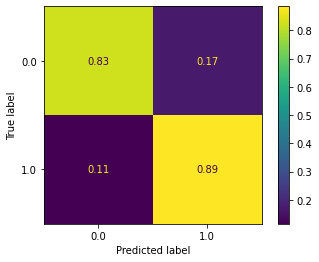

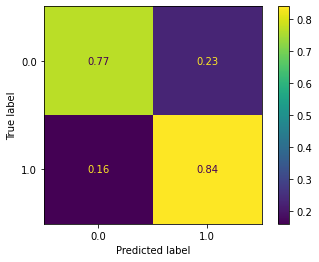

In [ ]:
cvc = tune_model_random(xgb_clf,
           xgboost_grid,
            x_train, x_test, 
            y_train, y_test,
            params_search = {'scoring':scoring_metric})
cvc_xgboost = cvc

Observamos que con este método obtenemos:
- Accuracy train 85.8%
- Accuracy test 80.5%

Con estos resultados observamos que este método también presenta un leve sobreajuste, y también tiene un accuracy muy similar al del modelo de regresión logística. 


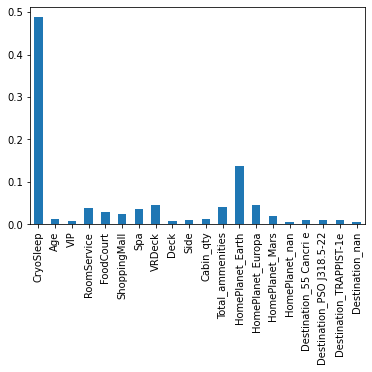

In [ ]:
#cvc.best_estimator_.feature_importance()
bestcoef = pd.Series(cvc.best_estimator_.feature_importances_, index = X.columns)
bestcoef.plot(kind="bar")

En este caso vemos que la variable más influyentes para la predicción es: "CryoSleep" y en menor medida la variable: "HomePlantet_Earth".

# Conclusión 

El máximo accuracy alcanzado fue de 80.5% utilizando el método de Gradient Boosting.

## Realizamos la predicción sobre el test

Generamos la predicción con el conjunto de test, aplicando el modelo con mayor accuracy (Gradient Boosting).

In [ ]:
X_test = df_test.copy()
X_test = drop_cols(X_test, cols_dropear)

In [ ]:
# Elegir mejor modelo
# cvc_xgboost, cvc_rf, cvc_log_regr
clf = cvc_xgboost.best_estimator_

In [ ]:
clf.fit(X,y)

XGBClassifier(alpha=20, colsample_bytree=0.6, max_depth=7, n_estimators=50,
              objective='reg:logistic', random_state=45)

In [ ]:
X.shape, df_test.shape

((7823, 20), (870, 21))

In [ ]:
X.columns, X_test.columns

(Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
        'Spa', 'VRDeck', 'Deck', 'Side', 'Cabin_qty', 'Total_ammenities',
        'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
        'HomePlanet_nan', 'Destination_55 Cancri e',
        'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
        'Destination_nan'],
       dtype='object'),
 Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
        'Spa', 'VRDeck', 'Deck', 'Side', 'Cabin_qty', 'Total_ammenities',
        'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
        'HomePlanet_nan', 'Destination_55 Cancri e',
        'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
        'Destination_nan'],
       dtype='object'))

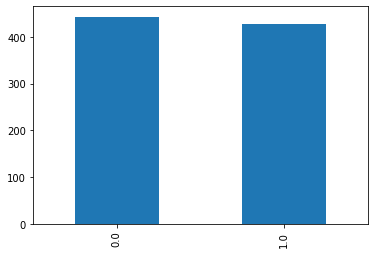

In [ ]:
test_predictions = clf.predict(X_test)
submission = pd.Series(test_predictions, index = X_test.index,
                       name = "Transported")
submission.value_counts().plot(kind= "bar")

In [ ]:
submission.index.name = "PassengerId"


In [ ]:
submission = submission.astype(int)

In [ ]:
submission.reset_index().to_csv("/content/drive/MyDrive/DIPLODATOS 2022 grupo 25/Entregables/4 - Aprendizaje Supervisado/submission.csv", index = False)

In [ ]:
submission.reset_index()

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1
...,...,...
865,5996,0
866,5478,1
867,6760,1
868,1437,0
